# 离散傅里叶变换正向推导

$$X_k=\sum_{n=0}^{N-1}x_n e^{-i2\pi kn/N}$$

In [1]:
import numpy as np
from numpy import fft

In [2]:
a=np.array([1,2,3])

In [3]:
fft.fft(a)

array([ 6. +0.j       , -1.5+0.8660254j, -1.5-0.8660254j])

In [5]:
b=[]
for k in range(len(a)):
    s=0
    for n in range(len(a)):
        s+=a[n]*np.exp(-2j*np.pi*k*n/len(a))
    b.append(s)
b

[(6+0j),
 (-1.5000000000000009+0.8660254037844375j),
 (-1.4999999999999984-0.8660254037844406j)]

# 离散傅里叶逆变换
傅里叶逆变换
$$x_k=\sum_{n=0}^{N-1}X_n e^{i2\pi kn/N}$$

In [6]:
fft.ifft(b)

array([1.-1.03620816e-15j, 2.-1.86982240e-16j, 3.+1.22319040e-15j])

In [16]:
c=[]
for k in range(len(b)):
    s=0
    for n in range(len(b)):
        s+=b[n]*np.exp(2j*np.pi*k*n/len(b))
    c.append(s/len(b))
c

[(1.0000000000000002-1.0362081563168126e-15j),
 (1.9999999999999996-1.4802973661668753e-16j),
 (3+4.440892098500626e-16j)]

# 傅里叶变换实现整数乘法

In [19]:
# 在频域中执行2倍然后再变换到时域
fft.ifft(2*np.array(b))

array([2.-2.07241631e-15j, 4.-3.73964480e-16j, 6.+2.44638079e-15j])

In [21]:
a=np.array([1,2,3])
b=np.array([4,5,6])
aa=fft.fft(a)
bb=fft.fft(b)

In [24]:
# 频域相加然后再转换到时域
cc=aa+bb
fft.ifft(cc)

array([5.+0.j, 7.+0.j, 9.+0.j])

In [26]:
# 频域相乘得到的结果已经是大整数乘法的结果了，只需要执行进位操作即可
fft.ifft(aa*bb)

array([31.+0.j, 31.+0.j, 28.+0.j])

In [26]:
import numpy as np
from numpy import fft
def biginteger_mul(a:str,b:str)->str:
    a=np.array([int(i)for i in a])
    b=np.array([int(i)for i in b])
    # 首先对齐
    sz=len(a)+len(b)+2
    a=np.pad(a,(sz-len(a),0))[::-1]
    b=np.pad(b,(sz-len(b),0))[::-1]
    aa=fft.fft(a)
    bb=fft.fft(b)
    cc=aa*bb
    c=fft.ifft(cc)
    d=[]
    left=0
    for i in range(len(c)):
        now=int(np.round(c[i].real+left))
        d.append(now%10)
        left=np.round(now//10)
    if left:
        d.append(left)
    return ''.join(str(i)for i in d)[::-1].lstrip('0')

def test(a:str,b:str):
    mine=biginteger_mul(a,b)
    ans=str(int(a)*int(b))
    if mine!=ans:
        print(f"found badcase a={a} b={b}",mine,ans)
        return False
    return True

def big_test():
    cas_list=np.random.randint(1,1000,(1234,2))
    for a,b in cas_list:
        if not test(str(a),str(b)):
            break
    print("全部通过")
big_test()

全部通过


# 从压缩角度看傅里叶变换
给定一个实数数组`a[N]`，它有N个实数组成。它的等价物是傅里叶变换之后的复数数组`b[N]`，一个复数等于两个实数，所以经过傅里叶变换之后有2N个实数，这是怎么回事？  
实际上，`b[N]`数组是有冗余的，`b[0]`是中心，`b[1..N-1]`是对称的，首尾两两组成共轭复数。  
$$若b_i=A+Bj,则b_{N-i}=A-Bj$$  

由此可知，当N为偶数的时候，`b[1..N-1]`是奇数个数，`b[0]`和`b[N//2]`虚部为0，实部对应两个实数。其余部分是对称的，对应N-2个实数。

当N为奇数的时候，`b[1..N-1]`是偶数个数，对应N-1个实数，`b[0]`对应一个实数。  

综上，不管怎么看，傅里叶变换之后依旧是N个有效实数。

In [36]:
for i in range(100):
    a=np.random.randint(1,100,np.random.randint(3,5))
    b=fft.fft(a)
    # 第一个数字虚部为0
    assert np.imag(b[0])==0
    b=b[1:]
    pre=b[:len(b)//2]
    back=b[len(b)-len(b)//2:]
    if len(b)%2==1:
        # 如果后半部分为偶数，则必定虚部也是0
        assert np.imag(b[len(b)//2])==0
    su=pre+back
    assert np.all(np.real(pre)==np.real(back[::-1]))
    assert np.all(np.imag(pre+back[::-1])<1e-5)

# 傅里叶变换和频率的对应关系
傅里叶变换实际上是频域和时域的映射。   
傅里叶正变换把时域映射到频域，傅里叶逆变换把频域映射成时域。  
时域的卷积等于频域的乘法，这个原理就是大整数运算成立的基本条件。  
经过傅里叶正变换，可以对频域进行一些分析。  

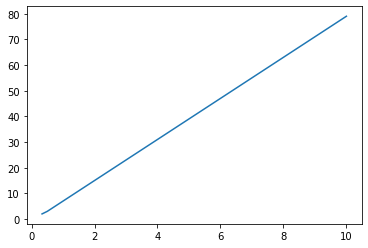

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
x=np.linspace(0,50,1000)
p=[]
for i in [1/3,1/2,1,2,3,4,5,6,7,8,9,10]:
    y=np.sin(i*x)
    y=np.abs(fft.fft(y))
    yy=y[1:len(y)//2]
    f=np.argmax(yy)# f就表示周期，每隔f个点组成一个周期
    p.append((i,f))
p=np.array(p)
plt.plot(p[:,0],p[:,1])

In [53]:
pd.DataFrame(p)

,0,1
0,0.333333,4.0
1,0.500000,7.0
2,1.000000,15.0
3,2.000000,31.0
4,3.000000,47.0
5,4.000000,63.0
6,5.000000,79.0
7,6.000000,95.0
8,7.000000,111.0
9,8.000000,126.0


In [60]:
np.mean(p[1:,1]/p[1:,0]),x[-1]/(2*np.pi)

(7.551911976911978, 7.957747154594767)

# 频率的几何意义
高频对应细节，低频对应梗概。  
基于此，可以实现滤波，低频滤波可以让图像变得模糊、让声音变得模糊，添加低频信号可以让图像变得清晰、让声音变得清晰。  

噪声的本质其实就是细节。  

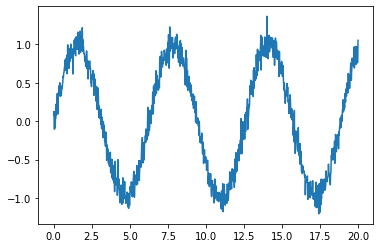

In [65]:
x=np.linspace(0,20,1000)
y=np.sin(x)+np.random.normal(0,0.1,len(x))
plt.plot(x,y)

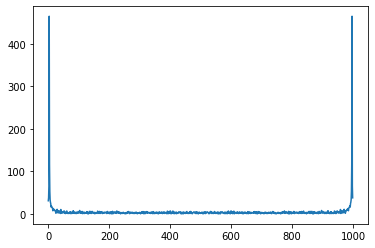

In [66]:
yy=fft.fft(y)
plt.plot(np.abs(yy))

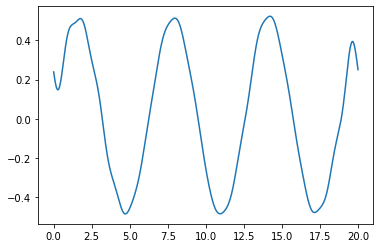

In [71]:
yy[20:]=0
yyy=fft.ifft(yy)
plt.plot(x,np.real(yyy))